# Imports Here

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convolution with padding

In [69]:
def convolution(image, kernel, stride = 1, padding = 0):

    kernal_h, kernel_w = kernel.shape
    padded_img = np.pad(image, ((padding, padding), (padding, padding)), mode = 'constant', constant_values = 0)

    o_height = ((image.shape[0] + 2 * padding - kernal_h) // stride) + 1
    o_width = ((image.shape[1] + 2 * padding - kernel_w) // stride) + 1

    resulted_img = np.zeros((o_height, o_width))

    for y in range(0, o_height):
        for x in range(0, o_width):
            resulted_img[y, x] = np.sum(kernel * padded_img[y*stride:y*stride+kernal_h, x*stride:x*stride+kernel_w])
    return resulted_img

# Pooling

In [70]:
def pooling(image, kernel_size=2, stride=2):

    o_height = ((image.shape[0] - kernel_size) // stride) + 1
    o_width = ((image.shape[1] - kernel_size) // stride) + 1
    resulted_img = np.zeros((o_height, o_width))

    for y in range(0, o_height):
        for x in range(0, o_width):
            resulted_img[y, x] = np.max(image[y*stride:y*stride+kernel_size, x*stride:x*stride+kernel_size])
    return resulted_img

# Load an image in grayscale

In [71]:
img = '/content/test.jpg'
image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
image = image / 255.0
image

array([[0.20784314, 0.20784314, 0.20784314, ..., 0.31764706, 0.31372549,
        0.35294118],
       [0.15294118, 0.15294118, 0.15294118, ..., 0.2745098 , 0.27058824,
        0.30588235],
       [0.16078431, 0.16078431, 0.16078431, ..., 0.2627451 , 0.25882353,
        0.31372549],
       ...,
       [0.14901961, 0.15294118, 0.14901961, ..., 0.10980392, 0.11764706,
        0.09803922],
       [0.14117647, 0.14509804, 0.14509804, ..., 0.10588235, 0.11372549,
        0.09803922],
       [0.13333333, 0.14117647, 0.1372549 , ..., 0.09411765, 0.09803922,
        0.09411765]])

#kernels for horizontal and vertical edge detection

In [74]:
horizontal_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
vertical_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Apply convolution with padding to maintain original size

In [75]:
padding = 1
horizontal_edges = convolution(image, horizontal_kernel, padding=padding)
vertical_edges = convolution(image, vertical_kernel, padding=padding)

# Combine edges

In [76]:
edges = np.sqrt(np.square(horizontal_edges) + np.square(vertical_edges))
pooled_edges = pooling(edges)

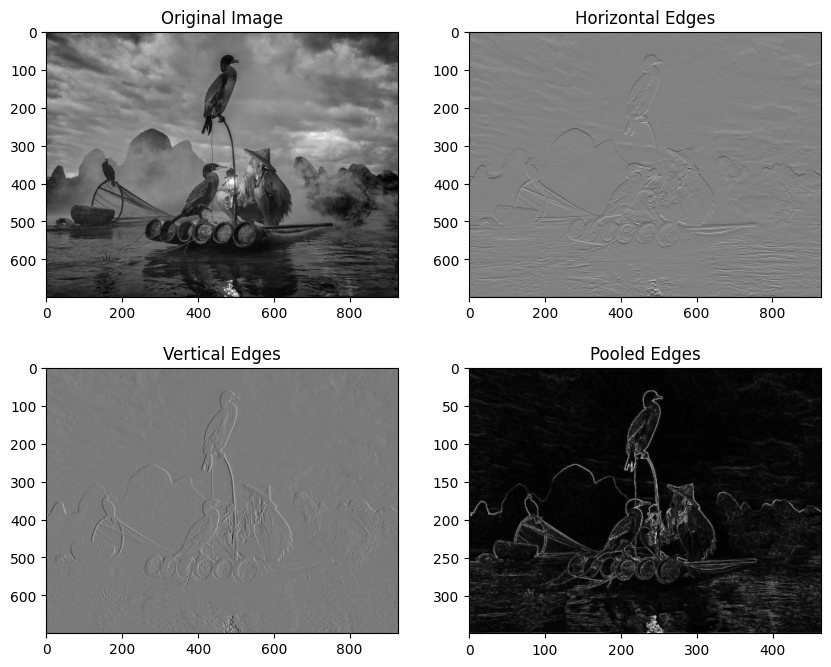

In [77]:
plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(horizontal_edges, cmap='gray'), plt.title('Horizontal Edges')
plt.subplot(223), plt.imshow(vertical_edges, cmap='gray'), plt.title('Vertical Edges')
plt.subplot(224), plt.imshow(pooled_edges, cmap='gray'), plt.title('Pooled Edges')
plt.show()